# Observations per user in the CNCs

In [6]:
import pandas as pd

# config
cities_years = {
    'London': [2018, 2019, 2020],
    'Los_Angeles': [2017, 2018, 2019, 2020],
    'San_Francisco': [2017, 2018, 2019, 2020]
}

In [42]:
# import datasets
from collections import defaultdict
dfs = defaultdict(dict)
dfall = []

for city, years in cities_years.items():
    for year in years:
        print("Loading: ", city, year)
        df = pd.read_csv("../data/CNC_{}_{}.csv".format(city, year))
        dfs[city][year] = df
        dfall.append(df)

dfall = pd.concat(dfall)
dfs['London'][2018].head()

Loading:  London 2018
Loading:  London 2019
Loading:  London 2020
Loading:  Los_Angeles 2017
Loading:  Los_Angeles 2018
Loading:  Los_Angeles 2019
Loading:  Los_Angeles 2020
Loading:  San_Francisco 2017
Loading:  San_Francisco 2018
Loading:  San_Francisco 2019
Loading:  San_Francisco 2020


,id,observed_on_string,time_observed_at,created_time_zone,created_at,updated_at,description,user_id,user_login,quality_grade,...,preferred_common_name,iconic_taxon_name,taxon_rank,taxon_parent_id,taxon_native,taxon_endemic,taxon_threatened,taxon_search_rank,taxon_observations,identifications
0,11479007,2018-04-27 7:52:34 am BST,2018-04-27T07:52:34+00:00,Etc/UTC,2018-04-27T07:06:17+00:00,2018-04-27T09:26:56+00:00,NaN,159021,muki,research,...,lesser celandine,Plantae,species,204212,True,False,False,27624,27624,"[{'user_id': 353381, 'category': 'improving', ..."
1,11480212,2018-04-27 8:39:41 am BST,2018-04-27T08:39:41+01:00,Europe/London,2018-04-27T09:02:52+01:00,2019-01-29T21:16:34+00:00,NaN,664459,lucyrobinsonnhm,research,...,Feral Pigeon,Aves,variety,3017,False,False,False,43329,43329,"[{'user_id': 29729, 'category': 'supporting', ..."
2,11480902,Fri Apr 27 2018 08:34:31 GMT+0100 (GMT+1),2018-04-27T08:34:31+02:00,Europe/Amsterdam,2018-04-27T10:42:01+02:00,2018-04-27T13:01:49+02:00,NaN,908315,tess26,casual,...,Spanish Bluebell,Plantae,species,56095,False,False,False,2813,2813,"[{'user_id': 908315, 'category': 'leading', 'd..."
3,11481097,Fri Apr 27 2018 09:54:35 GMT+0100 (GMT+1),2018-04-27T09:54:35+02:00,Europe/Amsterdam,2018-04-27T10:54:45+02:00,2018-04-27T22:23:41+02:00,NaN,796473,bryonycross,research,...,Green Alkanet,Plantae,species,156638,False,False,False,4639,4639,"[{'user_id': 160, 'category': 'improving', 'di..."
4,11482247,2018-04-27 8:42:21 am BST,2018-04-27T08:42:21+01:00,Europe/London,2018-04-27T11:09:55+01:00,2018-04-27T16:37:31+01:00,NaN,664459,lucyrobinsonnhm,research,...,London Plane,Plantae,hybrid,49664,False,False,False,5866,5866,"[{'user_id': 160, 'category': 'supporting', 'd..."


In [46]:
# total count of observations in all CNCs
all_obs = len(dfall)
print('Sum of observations of all CNCs:', all_obs)

Sum of observations of all CNCs: 244484


In [47]:
# count of different users who participated in the CNCs (counting each user only once, even if they participated in more than one challenge)
users_unique = len(dfall['user_id'].value_counts())
print('Total number of participants over all CNCs:', users_unique)

Total number of participants over all CNCs: 11300


In [57]:
# count of total participants of the CNCs (counting users as new users for each CNC, if they participated in more than one)
users_total = 0
# dataframe for observations per user over all CNCs (counting users as new users for each CNC, if they participated in more than one)
dfall2 = []

for city, years in cities_years.items():
    for year in years:
        print(city, year, ':')
        # user count over all CNCS (users who participated in several CNCs are counted as new users for each event)
        df_obs_per_user = dfs[city][year]['user_id'].value_counts()
        print('user count:', len(df_obs_per_user))
        users_total += len(df_obs_per_user)
        df_obs_per_user = df_obs_per_user.rename_axis('user_id').reset_index(name='obs_count')
        print(df_obs_per_user)
        dfall2.append(df_obs_per_user)

London 2018 :
user count: 108
     user_id  obs_count
0     353381        567
1     664459        150
2     911337        125
3     883351         97
4     781146         95
..       ...        ...
103   921599          1
104   921568          1
105   825087          1
106   546990          1
107  2072865          1

[108 rows x 2 columns]
London 2019 :
user count: 284
     user_id  obs_count
0     353381       1085
1    1358449        219
2     923147        202
3     894051        163
4     781146        145
..       ...        ...
279   880282          1
280  1677184          1
281   215911          1
282  1614885          1
283  3809444          1

[284 rows x 2 columns]
London 2020 :
user count: 572
     user_id  obs_count
0    1488476        355
1    2782355        299
2     353381        274
3    1624432        185
4     908569        183
..       ...        ...
567  2757049          1
568  1874720          1
569  2745022          1
570  1913260          1
571  3518114          

In [58]:
# users who participated in more than one challenge
print(users_total - users_unique)

2142


In [59]:
print('total user count:', users_total)
# observations per user, summed up over all CNCs

# Histogram of observations per user for all CNCs

# make log plot from histogram

total user count: 13442


In [60]:
dfall2 = pd.concat(dfall2)
dfall2.shape

(13442, 2)

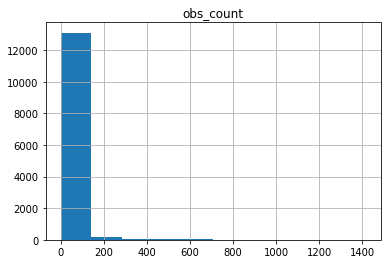

In [64]:
import matplotlib as plt

ax = dfall2.hist(column='obs_count')

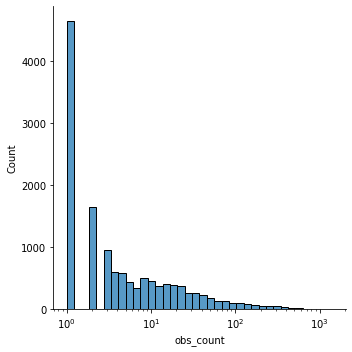

In [74]:
import seaborn as sns

sns.displot(data=dfall2, x="obs_count", log_scale=True)